### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
from analysis.measurement import measurement,baselineTest,tuningParameters
from analysis.clustering import clusteringBatch
from analysis.recommendation import searchKNearestNeighbors

In [3]:
def plotUtil(title, xlabel):
    plt.grid()
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

def plotLambda(df, title, xlabel):
    X = np.log10(df["Lambda"])
    plt.plot(X, df["Medoid Recall"], label="Medoids Recall")
    plt.plot(X, df["Centroid Recall"], label="Centroid Recall")
    plt.plot(X, df["Empty medoids"], label="Failed medoids")
    plt.plot(X, df["Empty centroids"], label="Failed centroids")
    plotUtil(title, xlabel)
    
def plotRecall(df,x_column,title,xlabel,baseline=pd.DataFrame()):
    X = df[x_column]
    plt.plot(X, df["Medoid Recall"], label="Medoids")
    plt.plot(X, df["Centroid Recall"], label="Centroids")
    if not baseline.empty:
        plt.plot(X, baseline["Recall"], label="Random articles", color='r')
    else:
        plt.hlines(0.19, xmin=0.25, xmax=5.0, label="Random articles", color='r')
        #plt.ylim(bottom=0.25)
    plotUtil(title, xlabel)
    
def plotFailed(df, x_column,title,xlabel,baseline=pd.DataFrame()):
    X = df[x_column]
    plt.plot(X, df["Empty medoids"], label="Medoids")
    plt.plot(X, df["Empty centroids"], label="Centroids")
    if not baseline.empty:
        plt.plot(X, baseline["Empty"], label="Random articles", color='r')
    else:
        plt.hlines(0.68, xmin=0.25, xmax=5.0, label="Random articles", color='r')
    plotUtil(title, xlabel)

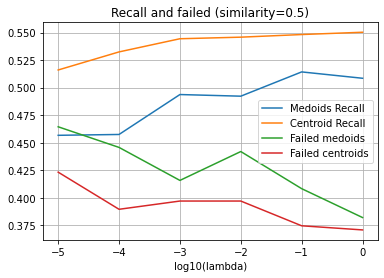

In [4]:
df = pd.read_csv('generate/lambda_tuning_1_th1_sim0.5.csv')
plotLambda(df, "Recall and failed (similarity=0.5)", "log10(lambda)")

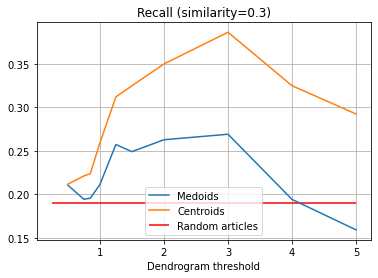

In [5]:
df = pd.read_csv('generate/threshold_tuning_1_lam0.1_sim0.3.csv')
plotRecall(df, "Threshold", "Recall (similarity=0.3)", "Dendrogram threshold")

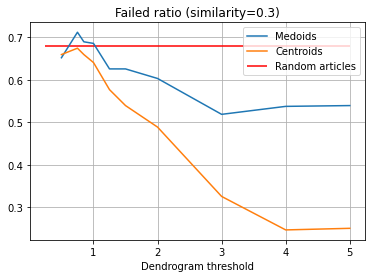

In [6]:
df = pd.read_csv('generate/threshold_tuning_1_lam0.1_sim0.3.csv')
plotFailed(df, "Threshold", "Failed ratio (similarity=0.3)", "Dendrogram threshold")

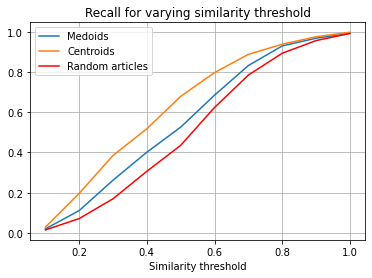

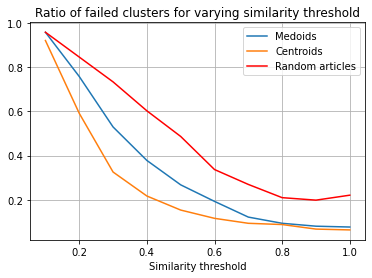

In [8]:
df1 = pd.read_csv('generate/similarity_tuning_1_lam0.1_th3.0.csv')
df2 = pd.read_csv('generate/baselineSimilarityThreshold.csv')
plotRecall(df1, "Similarity", "Recall for varying similarity threshold", "Similarity threshold",df2)
plotFailed(df1, "Similarity", "Ratio of failed clusters for varying similarity threshold", "Similarity threshold",df2)

In [ ]:
history = 'generate/user_history_1.csv'
impression = 'generate/user_impressions_1.csv'
similarity_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
result = []
for s in similarity_thresholds:
    print("Similarity threshold", s)
    print("Generating samples...")
    df_rnd, df_latest = baselineTest(history)
    print("Measuring...")
    df_measure_rnd = measurement(df_rnd,impression=impression,similarity_threshold=s)
    res = []
    res.append(s)
    res.append(df_measure_rnd.recall.mean()) 
    res.append(df_measure_rnd.percent_empty.mean())
    result.append(res)

df = pd.DataFrame(result, columns=['Similarity','Recall','Empty'])    
#df.to_csv("generate/baselineSimilarityThreshold.csv", index=False)

In [ ]:
def removeIndexCols(filename):
    df = pd.read_csv(filename)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df.to_csv(filename, index=False)
    df = pd.read_csv(filename)
    return df